In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("ConcreteStrength.CSV")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Normality Tests

In [3]:
def normality_test(arr: np.array, alpha: int):
    k, p = stats.normaltest(arr)
    if p < alpha:
        print("The null hypothesis can be rejected. p-value:", p)
    else:
        print("The null hypothesis cannot be rejected. p-value:", p)
"""
H0: The dataset follows normal distribution.
H1: The dataset does not follow normal distribution.
alpha = 0.05
"""

'\nH0: The dataset follows normal distribution.\nH1: The dataset does not follow normal distribution.\nalpha = 0.05\n'

In [4]:
def exclude_outliers_arr(arr: np.array):
    # exclude outliers based on the 6 sigma rule
    std_temp = arr.std()
    mean_temp = arr.mean()
    lower_limit = arr > mean_temp - 3 * std_temp
    upper_limit = arr < mean_temp + 3 * std_temp
    return arr[lower_limit & upper_limit]

In [5]:
for i in df:
    normality_test(df[i], 0.05)

The null hypothesis can be rejected. p-value: 3.882119832049044e-14
The null hypothesis can be rejected. p-value: 4.3137928491357e-24
The null hypothesis can be rejected. p-value: 0.0
The null hypothesis cannot be rejected. p-value: 0.43492562170891136
The null hypothesis can be rejected. p-value: 3.459309544852072e-31
The null hypothesis can be rejected. p-value: 8.454580261325214e-08
The null hypothesis can be rejected. p-value: 0.003713819663715185
The null hypothesis can be rejected. p-value: 1.0714325997785868e-158
The null hypothesis can be rejected. p-value: 4.937236241653123e-08


In [6]:
for i in df:
    normality_test(exclude_outliers_arr(df[i]), 0.05)

The null hypothesis can be rejected. p-value: 3.882119832049044e-14
The null hypothesis can be rejected. p-value: 3.0852999905739455e-30
The null hypothesis can be rejected. p-value: 0.0
The null hypothesis cannot be rejected. p-value: 0.8065262535406419
The null hypothesis can be rejected. p-value: 1.960213231831287e-11
The null hypothesis can be rejected. p-value: 8.454580261325214e-08
The null hypothesis can be rejected. p-value: 0.003713819663715185
The null hypothesis can be rejected. p-value: 1.2822750008802743e-85
The null hypothesis can be rejected. p-value: 4.937236241653123e-08


## Scatter Plot

In [7]:
import matplotlib.pyplot as plt

In [8]:
def exclude_outliers_df(df: pd.DataFrame, arr: str):
    # exclude outliers based on the 6 sigma rule
    std_temp = df[arr].std()
    mean_temp = df[arr].mean()
    lower_limit = df[arr] > mean_temp - 3 * std_temp
    upper_limit = df[arr] < mean_temp + 3 * std_temp
    return df[lower_limit & upper_limit]

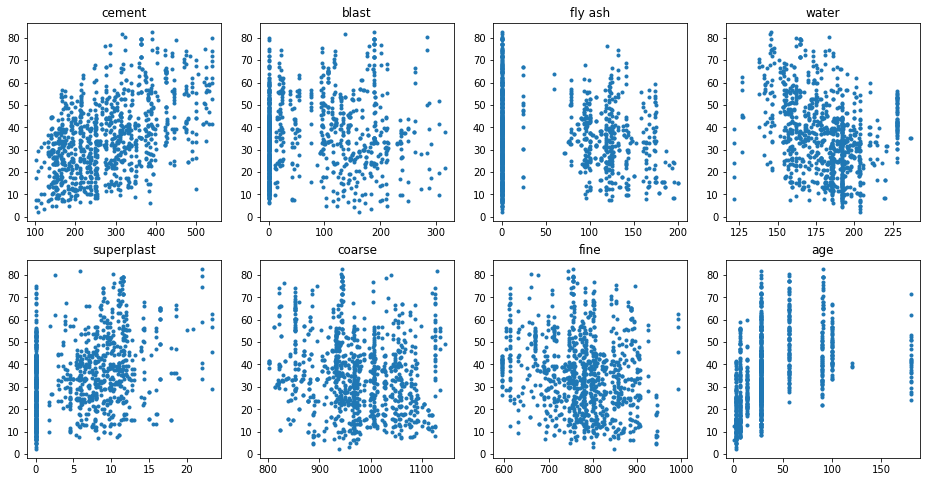

In [9]:
fig = plt.figure(figsize = [16, 8])   # fig
ax_0 = fig.add_subplot(241) # cement
ax_1 = fig.add_subplot(242) # blast
ax_2 = fig.add_subplot(243) # ash
ax_3 = fig.add_subplot(244) # water
ax_4 = fig.add_subplot(245) # superplast
ax_5 = fig.add_subplot(246) # coarse
ax_6 = fig.add_subplot(247) # fine
ax_7 = fig.add_subplot(248) # age

for i in range(0, len(df.columns) - 1):
    column_name = df.columns[i]
    df_clean = exclude_outliers_df(df, column_name)
    x = df_clean[column_name]
    y = df_clean[df.columns[len(df.columns) - 1]]
    
    if i == 0:
        ax_0.scatter(x, y, marker = ".")
        ax_0.title.set_text("cement")
    elif i == 1:
        ax_1.scatter(x, y, marker = ".")
        ax_1.title.set_text("blast")
    elif i == 2:
        ax_2.scatter(x, y, marker = ".")
        ax_2.title.set_text("fly ash")
    elif i == 3:
        ax_3.scatter(x, y, marker = ".")
        ax_3.title.set_text("water")
    elif i == 4:
        ax_4.scatter(x, y, marker = ".")
        ax_4.title.set_text("superplast")
    elif i == 5:
        ax_5.scatter(x, y, marker = ".")
        ax_5.title.set_text("coarse")
    elif i == 6:
        ax_6.scatter(x, y, marker = ".")
        ax_6.title.set_text("fine")
    else:  # i == 7
        ax_7.scatter(x, y, marker = ".")
        ax_7.title.set_text("age")

## Correlation Coefficients

In [10]:
def correlation_test(p: int):
    if p < 0.05:
        print("The null hypothesis can be rejected. (correlated)")
    else:
        print("The null hypothesis cannot be rejected. (uncorrelated)")
"""
H0: The two sets of data are uncorrelated.
H1: The two sets of data are correlated.
alpha = 0.05
"""

'\nH0: The two sets of data are uncorrelated.\nH1: The two sets of data are correlated.\nalpha = 0.05\n'

In [11]:
def calculate_correlation(x: np.array, y: np.array, column_name: str):
    if column_name == 'Water  (component 4)(kg in a m^3 mixture)':
        print("Pearson Correlation Test")
        r, p = stats.pearsonr(x, y)
    else:
        print("Spearman Correlation Test")
        r, p = stats.spearmanr(x, y)
    print("corr:", r, "p-value:", p)
    return r
    correlation_test(p)

In [12]:
corr = []
column = ['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']
std=['Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength']

for i in range(0, len(df.columns) - 1):
    column_name = df.columns[i]
    df_clean = exclude_outliers_df(df, column_name)
    x = df_clean[column_name]
    y = df_clean[df.columns[len(df.columns) - 1]]
    r = calculate_correlation(x, y, column_name)
    corr.append(r)

Spearman Correlation Test
corr: 0.4776143065003231 p-value: 8.265313080448207e-60
Spearman Correlation Test
corr: 0.16681955352171968 p-value: 7.674177313994752e-08
Spearman Correlation Test
corr: -0.07782971890884373 p-value: 0.012468684556008166
Pearson Correlation Test
corr: -0.2897769527948688 p-value: 2.4502633313175035e-21
Spearman Correlation Test
corr: 0.33422094015400505 p-value: 4.859217968609164e-28
Spearman Correlation Test
corr: -0.18354244378833753 p-value: 2.958825975296238e-09
Spearman Correlation Test
corr: -0.17996203988452888 p-value: 6.021248036751539e-09
Spearman Correlation Test
corr: 0.5941853757072834 p-value: 3.422108566415953e-96


In [13]:
data = [('corr', corr), ('Variables', column), ('MPa, megapascals', std)]
print(data)

[('corr', [0.4776143065003231, 0.16681955352171968, -0.07782971890884373, -0.2897769527948688, 0.33422094015400505, -0.18354244378833753, -0.17996203988452888, 0.5941853757072834]), ('Variables', ['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']), ('MPa, megapascals', ['Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength', 'Concrete Compressive Strength'])]


In [14]:
df_cor = pd.DataFrame.from_dict(dict(data))
df_cor.head()

,corr,Variables,"MPa, megapascals"
0,0.477614,Cement,Concrete Compressive Strength
1,0.166820,Blast,Concrete Compressive Strength
2,-0.077830,Fly Ash,Concrete Compressive Strength
3,-0.289777,Water,Concrete Compressive Strength
4,0.334221,Superplasticizer,Concrete Compressive Strength


In [15]:
df_pivot = df_cor.pivot('MPa, megapascals', 'Variables', 'corr')
df_pivot

Variables,Age,Blast,Cement,Coarse Aggregate,Fine Aggregate,Fly Ash,Superplasticizer,Water
"MPa, megapascals",,,,,,,,
Concrete Compressive Strength,0.594185,0.16682,0.477614,-0.183542,-0.179962,-0.07783,0.334221,-0.289777


<AxesSubplot:xlabel='Variables', ylabel='MPa, megapascals'>

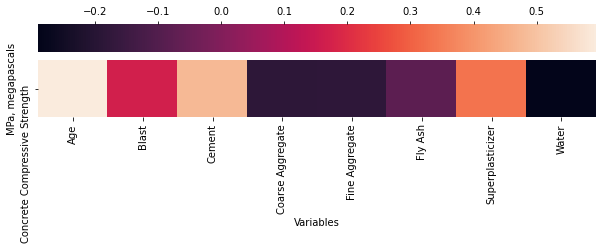

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 3))
sns.heatmap(df_pivot, cbar_kws = dict(use_gridspec = False, location = 'top', fraction = 0.6))

## Spearman Correlation Coefficient (~X Normal Distribution)